# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [28]:
NUM_POINTS = 1500

### Generate the Cities List by Using the `citipy` Library

In [29]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=NUM_POINTS)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=NUM_POINTS)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [30]:
# Set the API base URL
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
       # print("City not found. Skipping...")
        pass
    

              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ponta do sol
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | bathsheba
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | buin
Processing Record 6 of Set 1 | atar
Processing Record 7 of Set 1 | teguldet
Processing Record 8 of Set 1 | severo-kurilsk
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | adrar
Processing Record 11 of Set 1 | mahebourg
Processing Record 12 of Set 1 | beloha
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | angoche
Processing Record 16 of Set 1 | alekseyevsk
Processing Record 17 of Set 1 | shiraz
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | vila
Processing Record 23 of Set 1 | port elizabeth
Processing Re

Processing Record 48 of Set 4 | comodoro rivadavia
Processing Record 49 of Set 4 | beringovskiy
Processing Record 0 of Set 5 | uribia
Processing Record 1 of Set 5 | midland
Processing Record 2 of Set 5 | kodiak
Processing Record 3 of Set 5 | san juan
Processing Record 4 of Set 5 | hays
Processing Record 5 of Set 5 | yanan
Processing Record 6 of Set 5 | bundaberg
Processing Record 7 of Set 5 | lewiston
Processing Record 8 of Set 5 | xiamen
Processing Record 9 of Set 5 | torbay
Processing Record 10 of Set 5 | pitimbu
Processing Record 11 of Set 5 | price
Processing Record 12 of Set 5 | tebingtinggi
Processing Record 13 of Set 5 | pathein
Processing Record 14 of Set 5 | suar
Processing Record 15 of Set 5 | upernavik
Processing Record 16 of Set 5 | sawtell
Processing Record 17 of Set 5 | pochutla
Processing Record 18 of Set 5 | ngunguru
Processing Record 19 of Set 5 | scarborough
Processing Record 20 of Set 5 | lolua
Processing Record 21 of Set 5 | vaitupu
Processing Record 22 of Set 5 | t

Processing Record 47 of Set 8 | caravelas
Processing Record 48 of Set 8 | alikovo
Processing Record 49 of Set 8 | asau
Processing Record 0 of Set 9 | tilichiki
Processing Record 1 of Set 9 | faro
Processing Record 2 of Set 9 | borogontsy
Processing Record 3 of Set 9 | hecun
Processing Record 4 of Set 9 | tecpatan
Processing Record 5 of Set 9 | sept-iles
Processing Record 6 of Set 9 | road town
Processing Record 7 of Set 9 | harare
Processing Record 8 of Set 9 | ostrovnoy
Processing Record 9 of Set 9 | leua
Processing Record 10 of Set 9 | north bend
Processing Record 11 of Set 9 | syracuse
Processing Record 12 of Set 9 | cazaje
Processing Record 13 of Set 9 | thompson
Processing Record 14 of Set 9 | tuy hoa
Processing Record 15 of Set 9 | mogadishu
Processing Record 16 of Set 9 | mumbwa
Processing Record 17 of Set 9 | mugur-aksy
Processing Record 18 of Set 9 | lubao
Processing Record 19 of Set 9 | andenes
Processing Record 20 of Set 9 | port pirie
Processing Record 21 of Set 9 | roma
Pr

Processing Record 43 of Set 12 | maryville
Processing Record 44 of Set 12 | muisne
Processing Record 45 of Set 12 | artesia
Processing Record 46 of Set 12 | namasuba
Processing Record 47 of Set 12 | kabinda
Processing Record 48 of Set 12 | bonanza
-----------------------------
Data Retrieval Complete      
-----------------------------


In [31]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


In [32]:
# Display sample data
city_data_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ponta do sol,32.6667,-17.1000,64.00,48,10,7.78,PT,1675704725
1,bluff,-46.6000,168.3333,60.91,69,58,19.42,NZ,1675704726
2,bathsheba,13.2167,-59.5167,84.81,61,75,20.71,BB,1675704454
3,talnakh,69.4865,88.3972,-9.80,98,100,5.19,RU,1675704728
4,buin,-33.7333,-70.7500,93.43,26,0,9.80,CL,1675704505


In [33]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data_file.csv", index_label="City_ID")

In [34]:
# Read saved data
city_data_df = pd.read_csv("output_data_file.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ponta do sol,32.6667,-17.1000,64.00,48,10,7.78,PT,1675704725
1,bluff,-46.6000,168.3333,60.91,69,58,19.42,NZ,1675704726
2,bathsheba,13.2167,-59.5167,84.81,61,75,20.71,BB,1675704454
3,talnakh,69.4865,88.3972,-9.80,98,100,5.19,RU,1675704728
4,buin,-33.7333,-70.7500,93.43,26,0,9.80,CL,1675704505


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

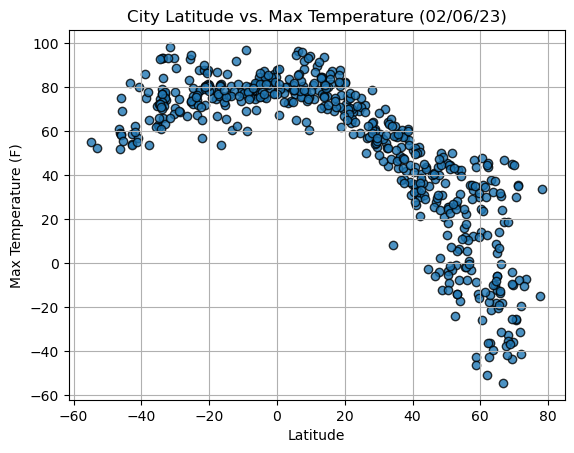

In [35]:
# Build scatter plot for latitude vs. temperature
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
           city_data_df["Max Temp"],
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

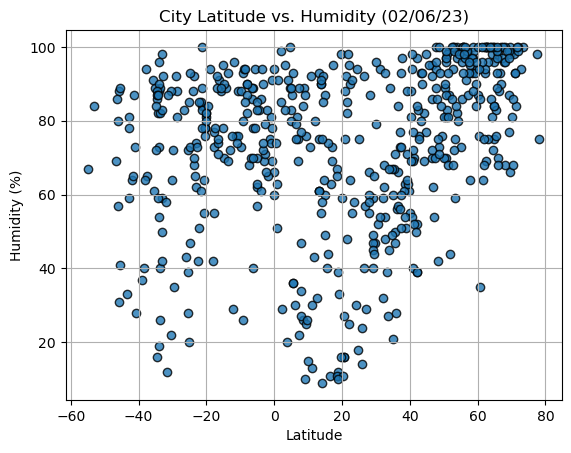

In [36]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

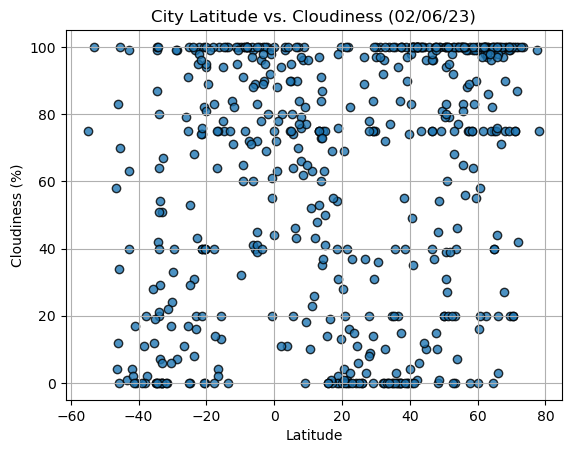

In [37]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

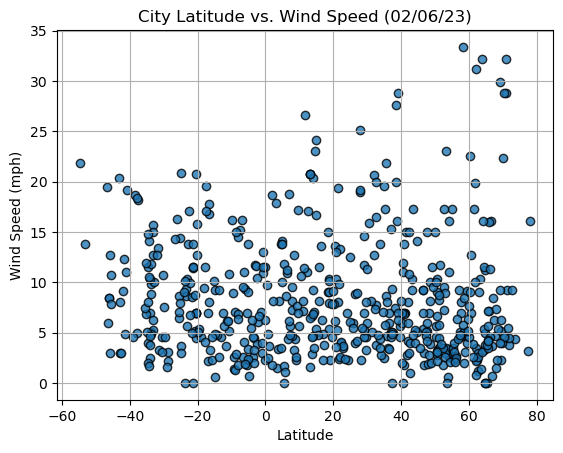

In [38]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
           city_data_df["Wind Speed"],
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
#scipy.stats.linregress


###  Temperature vs. Latitude Linear Regression Plot

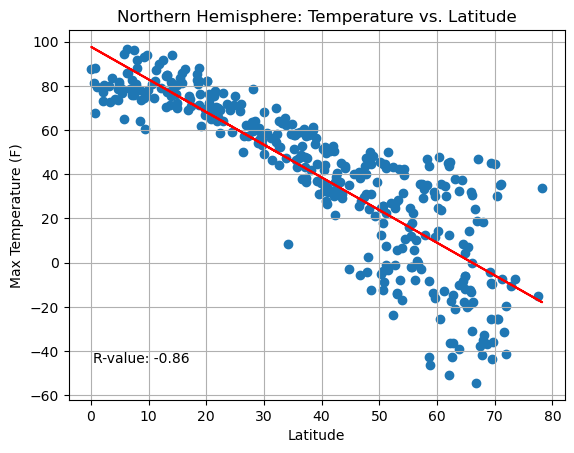

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Filter the northern hemisphere data
northern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Create a DataFrame from the northern hemisphere data
northern_hemisphere_df = pd.DataFrame(northern_hemisphere)

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Fit a linear model to the data
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"])

# Create a scatter plot of the data
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"])

# Add the regression line to the plot
plt.plot(northern_hemisphere_df["Lat"], intercept + slope*northern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere: Temperature vs. Latitude')
plt.grid()

# Annotate the plot with the R-value
plt.annotate(f'R-value: {r_value:.2f}', xy=(0.05, 0.10), xycoords='axes fraction')

# Show the plot
plt.show()

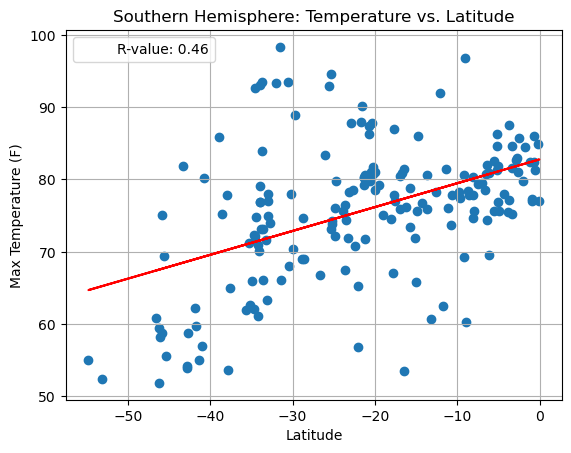

In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# Filter the northern hemisphere data
southern_hemisphere = [city for city in city_data if city["Lat"] <= 0]

# Create a DataFrame from the northern hemisphere data
southern_hemisphere_df = pd.DataFrame(southern_hemisphere)

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Fit a linear model to the data
slope, intercept, r_value, p_value, std_err = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"])

# Create a scatter plot of the data
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"])

# Add the regression line to the plot
plt.plot(southern_hemisphere_df["Lat"], intercept + slope*southern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere: Temperature vs. Latitude')
plt.grid()
plt.legend([f'R-value: {r_value:.2f}'], markerscale=0)


# Show the plot
plt.show()

**Discussion about the linear relationship:** The correlation direction is different: The correlation coefficient is positive in the southern hemisphere and negative in the northern hemisphere, indicating a different relationship between temperature and latitude in the two hemispheres. In the southern hemisphere, temperature tends to increase as latitude increases, but in the northern hemisphere, temperature tends to decrease as latitude increases. This difference could be caused by ocean currents, atmospheric circulation patterns, and the amount of solar radiation received.

### Humidity vs. Latitude Linear Regression Plot

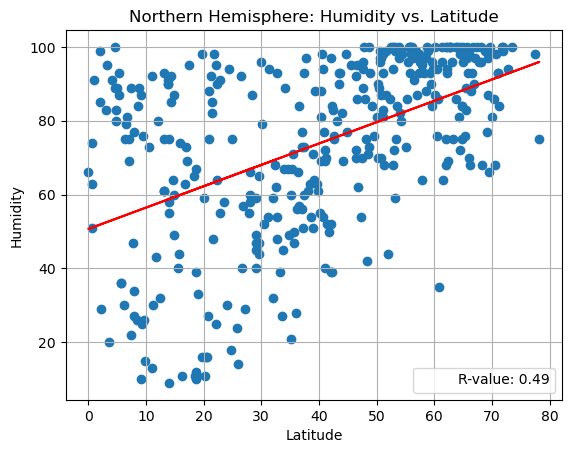

In [46]:
# Linear regression on Northern Hemisphere
northern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Perform linear regression on the northern hemisphere data
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"])
linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"])

# Create a scatter plot of the data
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"])

# Add the regression line to the plot
plt.plot(northern_hemisphere_df["Lat"], intercept + slope*northern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere: Humidity vs. Latitude')
plt.grid()
plt.legend([f'R-value: {r_value:.2f}'], markerscale=0)

#Display
plt.show()

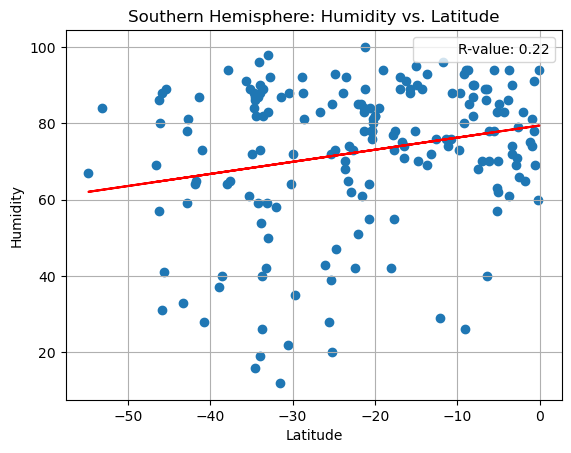

In [47]:
# Linear regression on Southern Hemisphere
southern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Perform linear regression on the northern hemisphere data
slope, intercept, r_value, p_value, std_err = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"])
linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"])

# Create a scatter plot of the data
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"])

# Add the regression line to the plot
plt.plot(southern_hemisphere_df["Lat"], intercept + slope*southern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere: Humidity vs. Latitude')
plt.grid()
plt.legend([f'R-value: {r_value:.2f}'], markerscale=0)


#Display
plt.show()

**Discussion about the linear relationship:** The correlation direction is the same in both hemispheres: The correlation coefficient is positive in both the northern and southern hemisphere, indicating that the relationship between humidity and latitude is similar in both hemispheres. In both hemispheres, humidity tends to increase as latitude increases, but the strength of this relationship is stronger in the northern hemisphere than in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

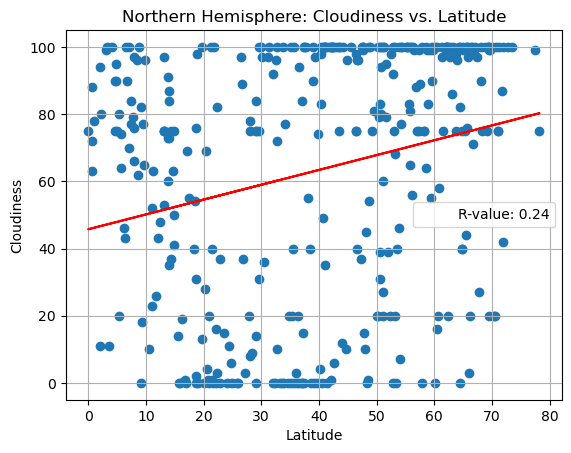

In [48]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
northern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Perform linear regression on the northern hemisphere data
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"])
linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"])

# Create a scatter plot of the data
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"])

# Add the regression line to the plot
plt.plot(northern_hemisphere_df["Lat"], intercept + slope*northern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere: Cloudiness vs. Latitude')
plt.grid()
plt.legend([f'R-value: {r_value:.2f}'], markerscale=0)

#Display
plt.show()

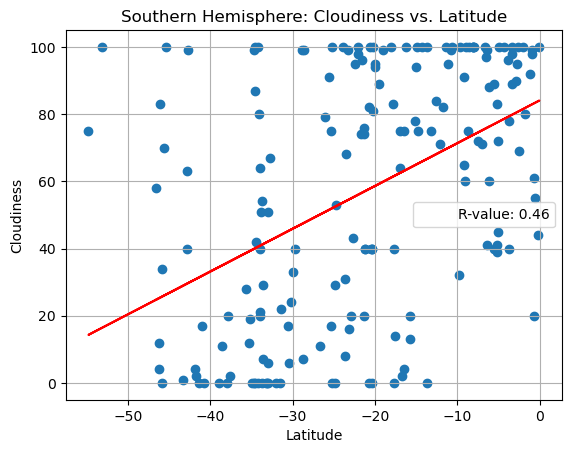

In [50]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
southern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Perform linear regression on the northern hemisphere data
slope, intercept, r_value, p_value, std_err = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"])
linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"])

# Create a scatter plot of the data
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"])

# Add the regression line to the plot
plt.plot(southern_hemisphere_df["Lat"], intercept + slope*southern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere: Cloudiness vs. Latitude')
plt.grid()
plt.legend([f'R-value: {r_value:.2f}'], markerscale=0)

#Display
plt.show()

**Discussion about the linear relationship:** The correlation direction and strength are similar in both hemispheres: The correlation coefficient is positive in both the northern and southern hemisphere, and the correlation strength is similar in both hemispheres, indicating that the relationship between cloudiness and latitude is similar in both hemispheres. In both hemispheres, cloudiness tends to increase as latitude increases, but the strength of this relationship is not particularly strong in either hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

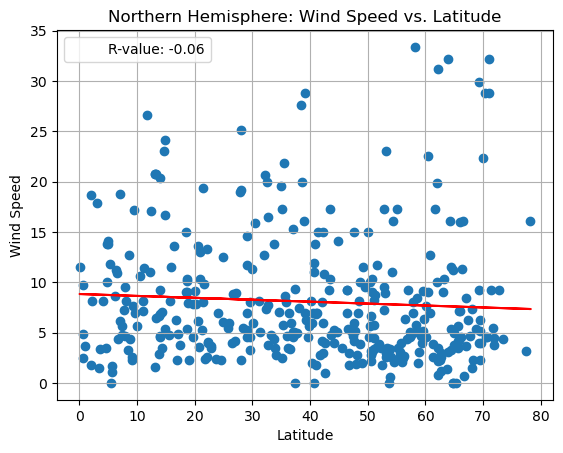

In [51]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
northern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Perform linear regression on the northern hemisphere data
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"])
linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"])

# Create a scatter plot of the data
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"])

# Add the regression line to the plot
plt.plot(northern_hemisphere_df["Lat"], intercept + slope*northern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere: Wind Speed vs. Latitude')
plt.grid()
plt.legend([f'R-value: {r_value:.2f}'], markerscale=0)


#Display
plt.show()

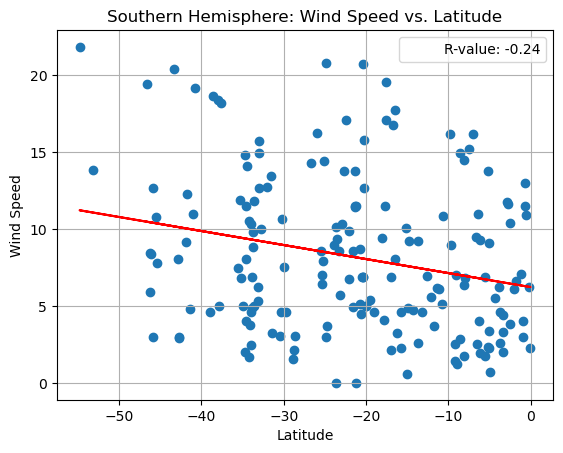

In [52]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
southern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Perform linear regression on the northern hemisphere data
slope, intercept, r_value, p_value, std_err = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"])
linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"])

# Create a scatter plot of the data
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"])

# Add the regression line to the plot
plt.plot(southern_hemisphere_df["Lat"], intercept + slope*southern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere: Wind Speed vs. Latitude')
plt.grid()
plt.legend([f'R-value: {r_value:.2f}'], markerscale=0)

#Display
plt.show()

**Discussion about the linear relationship:** An r-value of -0.27 for southern hemisphere for wind speed vs latitude suggests that there is a weak negative correlation between wind speed and latitude in the southern hemisphere. This means that as latitude increases (moving towards the poles), wind speed tends to decrease.The correlation coefficient is positive in the northern hemisphere indicating a different relationship between wind speed and latitude in the two hemispheres.